# 六.图像缩放、图像旋转、图像翻转与图像平移

讲解Python调用OpenCV实现图像位移操作、旋转和翻转效果，包括四部分知识：

1.图像缩放

2.图像旋转

3.图像翻转

4.图像平移


## 6.1图像缩放

图像缩放主要调用resize()函数实现，具体如下：

result = cv2.resize(src, dsize[, result[. fx[, fy[, interpolation]]]])

其中src表示原始图像，dsize表示缩放大小，fx和fy也可以表示缩放大小倍数，他们两个（dsize或fx\fy）设置一个即可实现图像缩放。


例如：

result = cv2.resize(src, (160,160))

result = cv2.resize(src, None, fx=0.5, fy=0.5)图像缩放：设（x0, y0）是缩放后的坐标，（x, y）是缩放前的坐标，sx、sy为缩放因子，则公式如下：


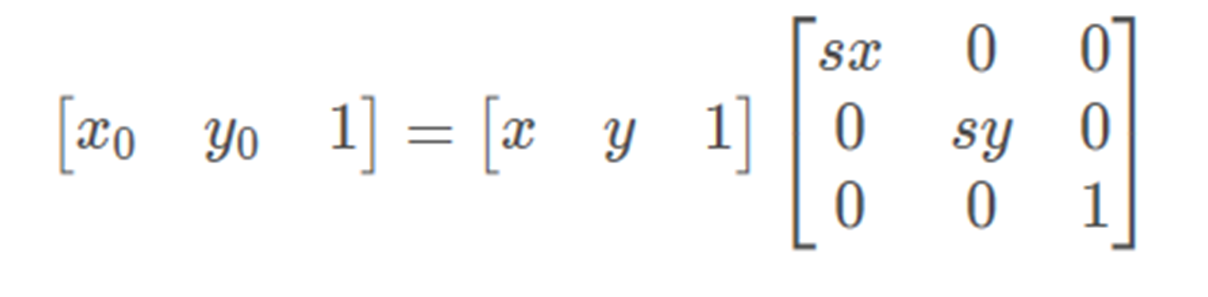

In [3]:
import cv2  
import numpy as np  
 
#读取图片
src = cv2.imread('test.jpg')

#图像缩放
result = cv2.resize(src, (200,100))
print(result.shape)

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", result)
# 
#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


(100, 200, 3)


需要注意的是，
代码中 cv2.resize(src, (200,100)) 
设置的dsize是列数为200，
行数为100。

同样，可以获取原始图像像素
再乘以缩放系数进行图像变换!

In [4]:
import cv2  
import numpy as np  
 
#读取图片
src = cv2.imread('test.jpg')
rows, cols = src.shape[:2]
print(rows, cols)

#图像缩放 dsize(列,行)
result = cv2.resize(src, (int(cols*0.6), int(rows*1.2)))

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", result)
# 
#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


400 400


最后讲解(fx,fy)缩放倍数的方法对图像进行放大或缩小。

按照0.3比例输出


In [5]:
import cv2  
import numpy as np  
 
#读取图片
src = cv2.imread('test.jpg')
rows, cols = src.shape[:2]
print(rows, cols)

#图像缩放
result = cv2.resize(src, None, fx=0.3, fy=0.3)

#显示图像
cv2.imshow("src", src)
cv2.imshow("result", result)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


400 400


## 6.2图像旋转

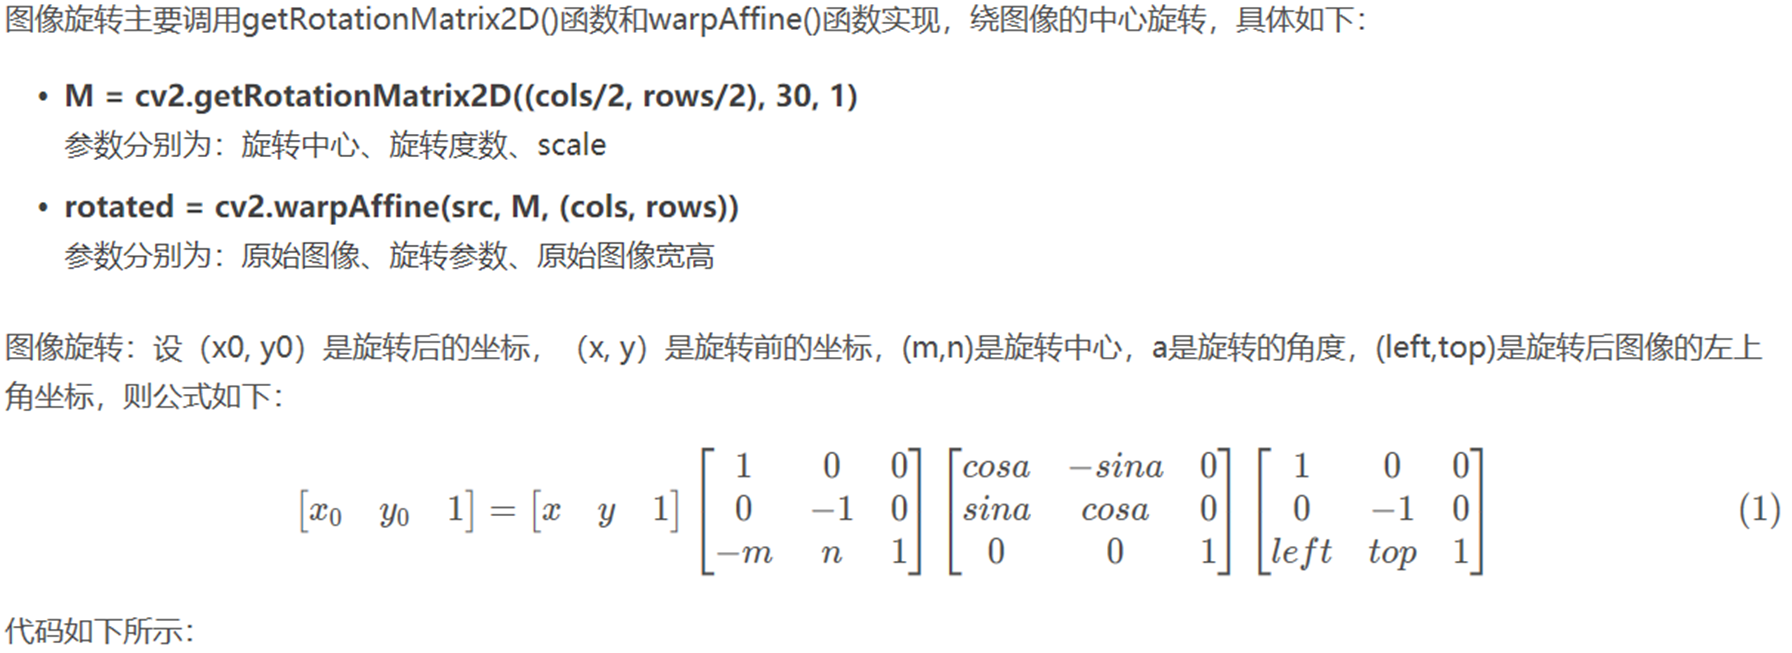

In [6]:
import cv2  
import numpy as np  
 
#读取图片
src = cv2.imread('test.jpg')

#原图的高、宽 以及通道数
rows, cols, channel = src.shape

#绕图像的中心旋转
#参数：旋转中心 旋转度数 scale
M = cv2.getRotationMatrix2D((cols/2, rows/2), 30, 1)
#参数：原始图像 旋转参数 元素图像宽高
rotated = cv2.warpAffine(src, M, (cols, rows))

#显示图像
cv2.imshow("src", src)
cv2.imshow("rotated", rotated)

#等待显示
cv2.waitKey(0)
cv2.destroyAllWindows()


如果设置-90度，则核心代码和图像如下所示。

M = cv2.getRotationMatrix2D((cols/2, rows/2), -90, 1)

rotated = cv2.warpAffine(src, M, (cols, row))


## 6.3图像翻转

图像翻转在OpenCV中调用函数flip()实现，原型如下：

dst = cv2.flip(src, flipCode)其中src表示原始图像，flipCode表示翻转方向

如果flipCode为0，则以X轴为对称轴翻转，如果fliipCode>0则以Y轴为对称轴翻转，如果flipCode<0则在X轴、Y轴方向同时翻转。代码如下所示：


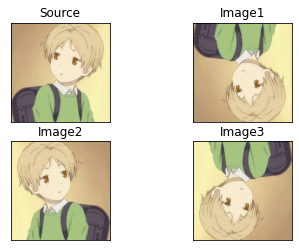

In [7]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
src = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#图像翻转
#0以X轴为对称轴翻转 >0以Y轴为对称轴翻转 <0X轴Y轴翻转
img1 = cv2.flip(src, 0)
img2 = cv2.flip(src, 1)
img3 = cv2.flip(src, -1)

#显示图形
titles = ['Source', 'Image1', 'Image2', 'Image3']  
images = [src, img1, img2, img3]  
for i in range(4):  
   plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  


## 6.4图像平移

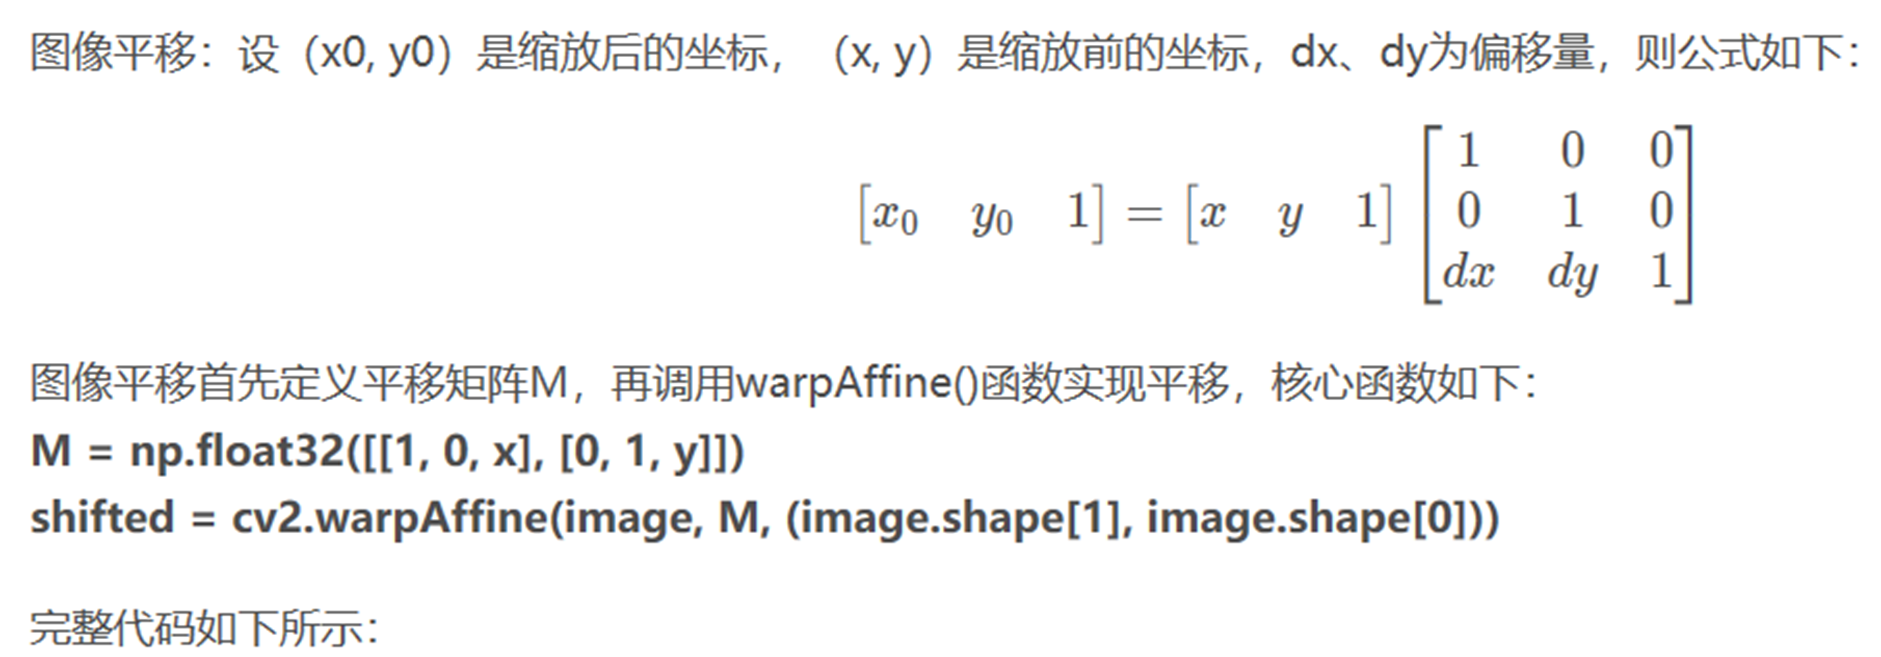

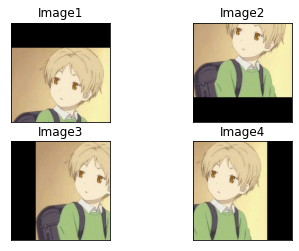

In [8]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
 
#读取图片
img = cv2.imread('test.jpg')
image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#图像平移 下、上、右、左平移
M = np.float32([[1, 0, 0], [0, 1, 100]])
img1 = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

M = np.float32([[1, 0, 0], [0, 1, -100]])
img2 = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

M = np.float32([[1, 0, 100], [0, 1, 0]])
img3 = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

M = np.float32([[1, 0, -100], [0, 1, 0]])
img4 = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))

#显示图形
titles = [ 'Image1', 'Image2', 'Image3', 'Image4']  
images = [img1, img2, img3, img4]  
for i in range(4):  
   plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  
